In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [33]:
# Evaluation results for regular predictor.
path_to_data = '/home/ericwang/diffsketch/results/computed_evals_2025-12-09_17-03-37.json'
# path_to_data = '/home/ericwang/diffsketch/results/computed_evals_2025-12-09_16-51-24.json'
with open(path_to_data) as f:
    data = json.load(f)
data

{'num_input_sketches': 5,
 'sketch_params': [[8, 605],
  [8, 732],
  [9, 9139],
  [8, 1073],
  [9, 4985],
  [8, 1260],
  [8, 2602],
  [8, 1023],
  [9, 213],
  [9, 4440],
  [9, 207],
  [8, 1775],
  [8, 1056],
  [8, 3227],
  [8, 350],
  [8, 14187],
  [9, 4611],
  [9, 9988],
  [8, 2242],
  [8, 938],
  [9, 4930],
  [9, 4579],
  [9, 12336],
  [9, 11806],
  [8, 1002],
  [8, 13902],
  [8, 505],
  [9, 8985],
  [8, 333],
  [8, 1053],
  [9, 204],
  [8, 2713],
  [8, 2591],
  [8, 1066],
  [8, 1021],
  [9, 213],
  [9, 4702],
  [8, 1368],
  [9, 6222],
  [8, 404],
  [9, 12572],
  [8, 712],
  [9, 6333],
  [9, 7494],
  [8, 760],
  [8, 2190],
  [8, 841],
  [8, 2549],
  [9, 6906],
  [8, 570],
  [8, 314],
  [8, 661],
  [8, 302],
  [8, 325],
  [9, 7631],
  [9, 7675],
  [8, 1662],
  [8, 1066],
  [8, 548],
  [8, 954],
  [8, 2839],
  [8, 4017],
  [8, 2806],
  [8, 14038],
  [9, 206],
  [8, 1343],
  [9, 7351],
  [9, 11018],
  [9, 6261],
  [9, 10247],
  [8, 13437],
  [8, 1016],
  [9, 209],
  [8, 4060],
  [9, 677

In [34]:
# Evaluation data for predictor trained with additional entropy predictor.
path_to_data = '/home/ericwang/diffsketch/results/computed_evals_2025-12-13_19-13-46.json' # Predict entropy using (d, w) with separate linear layer.
with open(path_to_data) as f:
    entropy_data = json.load(f)
entropy_data

{'model_path': '/home/ericwang/diffsketch/experiments/size_penalty_test/sketch_model_2025-12-13_18-35-15.pth',
 'num_input_sketches': 5,
 'sketch_params': [[8, 1548],
  [8, 3151],
  [8, 1085],
  [8, 10790],
  [8, 228],
  [8, 296],
  [8, 4214],
  [8, 12003],
  [8, 461],
  [8, 1058],
  [8, 891],
  [8, 2751],
  [8, 1362],
  [8, 221],
  [8, 538],
  [8, 404],
  [8, 1055],
  [8, 5895],
  [8, 2778],
  [8, 4599],
  [8, 4730],
  [8, 304],
  [8, 1600],
  [8, 1480],
  [8, 2310],
  [8, 9007],
  [8, 5280],
  [8, 2313],
  [8, 821],
  [8, 9967],
  [8, 7678],
  [8, 1855],
  [8, 2643],
  [8, 391],
  [8, 4115],
  [8, 398],
  [8, 2051],
  [8, 224],
  [8, 4095],
  [8, 1632],
  [8, 1593],
  [8, 713],
  [8, 1260],
  [8, 227],
  [8, 399],
  [8, 464],
  [8, 1413],
  [8, 2690],
  [8, 2305],
  [8, 277],
  [8, 1180],
  [8, 221],
  [8, 927],
  [8, 331],
  [8, 832],
  [8, 557],
  [8, 9646],
  [8, 230],
  [8, 248],
  [8, 5792],
  [8, 223],
  [8, 3712],
  [8, 772],
  [8, 1098],
  [8, 1498],
  [8, 245],
  [8, 1214],


In [37]:
# Regular.
epsilons = np.array(data['epsilons'])
sketch_params = np.array(data['sketch_params'])
memory_usages = []
for eps, (d, w) in zip(epsilons, sketch_params):
    theoretical_w = 2 / eps
    mem_usage = w / theoretical_w
    memory_usages.append(mem_usage)

memory_usages = np.array(memory_usages)
np.mean(memory_usages)

np.float64(0.4174298005689061)

In [36]:
# Trained with entropy.
epsilons_entropy = np.array(entropy_data['epsilons'])
sketch_params_entropy = np.array(entropy_data['sketch_params'])
memory_usages_entropy = []
for eps, (d, w) in zip(epsilons, sketch_params):
    theoretical_w = 2 / eps
    mem_usage = w / theoretical_w
    memory_usages_entropy.append(mem_usage)

memory_usages_entropy = np.array(memory_usages_entropy)
np.mean(memory_usages_entropy)

np.float64(0.30295243820007717)

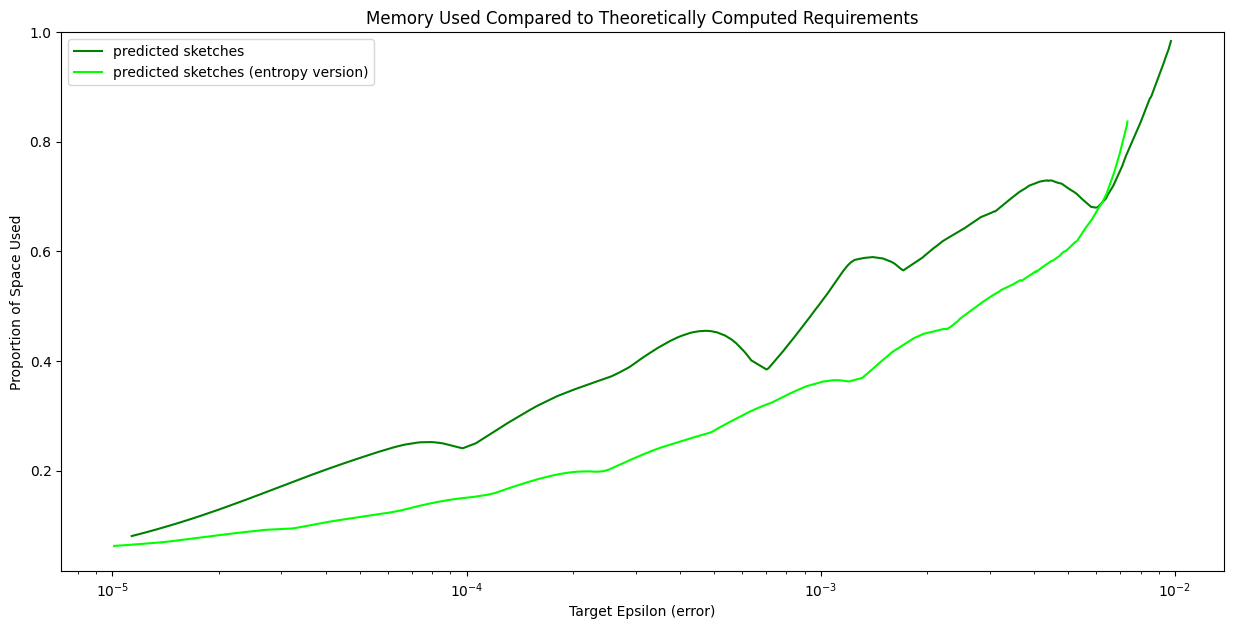

In [53]:
fig, ax = plt.subplots(figsize=(15,7))

sort_idx = np.argsort(epsilons)
ax.plot(epsilons[sort_idx], memory_usages[sort_idx], color='green', label='predicted sketches')

sort_idx = np.argsort(epsilons_entropy)
ax.plot(epsilons_entropy[sort_idx], memory_usages_entropy[sort_idx], color='lime', label='predicted sketches (entropy version)')

ax.set_title('Memory Used Compared to Theoretically Computed Requirements')
ax.set_xlabel('Target Epsilon (error)')
ax.set_ylabel('Proportion of Space Used')

ax.set_xscale('log')

ax.set_ylim(ymax=1)

ax.legend()

fig.show()

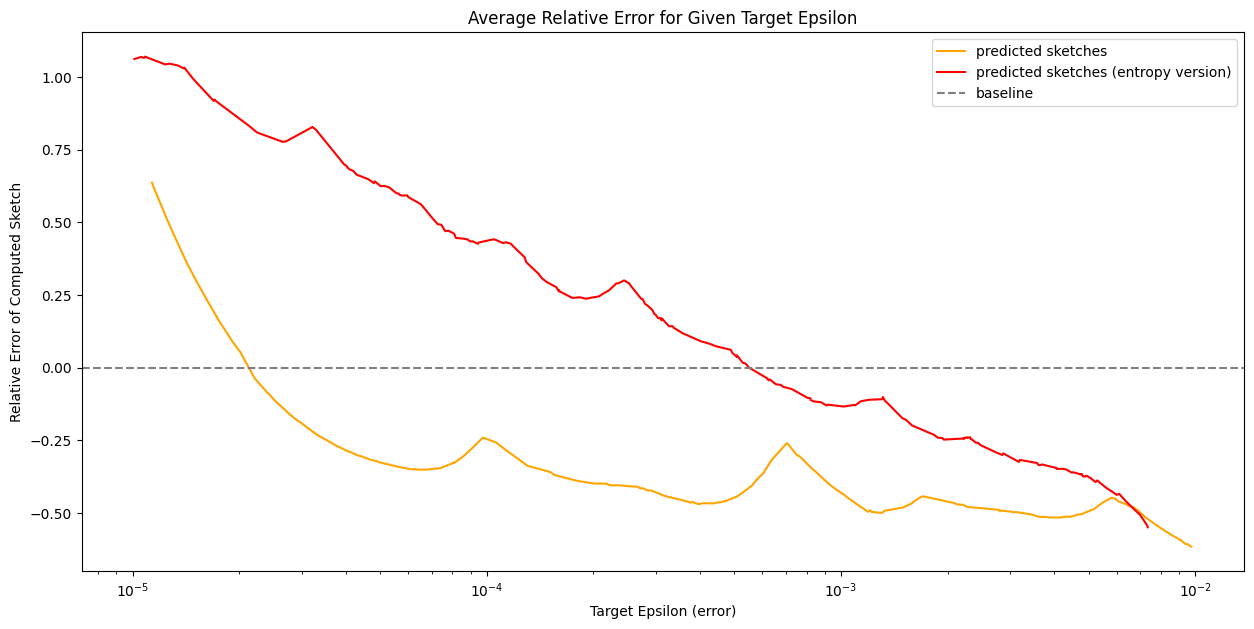

In [52]:
# Measures relative deviation from target epsilon. So if we have target eps = 0.1, and our relative error is -0.4, that means our computed sketch's
# actual error is 40% less (0.06). In other words, our predicted sketch had 40% lower error rate.

fig, ax = plt.subplots(figsize=(15,7))

sort_idx = np.argsort(epsilons)
rel_errors = np.array(data['relative_errors'])

ax.plot(epsilons[sort_idx], rel_errors[sort_idx], color='orange', label='predicted sketches')

sort_idx = np.argsort(epsilons_entropy)
rel_errors_entropy = np.array(entropy_data['relative_errors'])
ax.plot(epsilons_entropy[sort_idx], rel_errors_entropy[sort_idx], color='red', label='predicted sketches (entropy version)')

ax.axhline(y=0, color='gray', linestyle='--', label='baseline')

ax.set_title('Average Relative Error for Given Target Epsilon')
ax.set_xlabel('Target Epsilon (error)')
ax.set_ylabel('Relative Error of Computed Sketch')

ax.set_xscale('log')

ax.legend()

fig.show()

In [54]:
rel_errors.mean(), rel_errors_entropy.mean()

(np.float64(-0.33435422779398505), np.float64(0.14452559127427633))

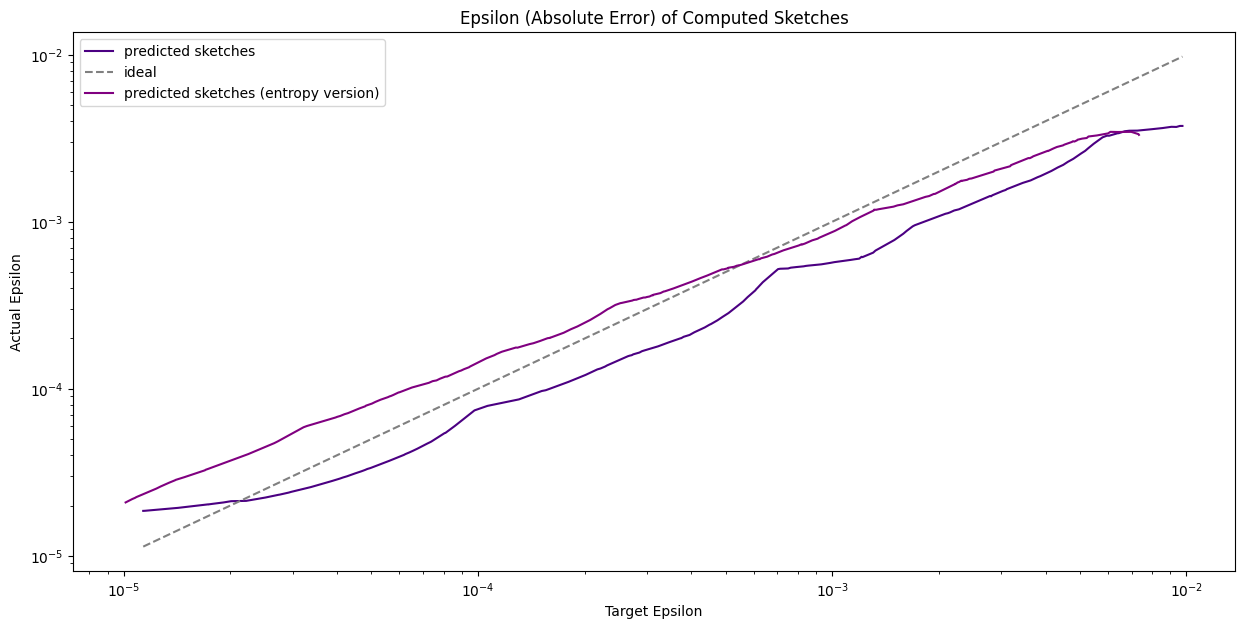

In [51]:
fig, ax = plt.subplots(figsize=(15,7))

sort_idx = np.argsort(epsilons)
avg_errors = np.array(data['average_errors'])

ax.plot(epsilons[sort_idx], avg_errors[sort_idx], color='indigo',  label='predicted sketches')
ax.plot(epsilons[sort_idx], epsilons[sort_idx], color='gray', linestyle='--', label='ideal')

sort_idx = np.argsort(epsilons_entropy)
avg_errors_entropy = np.array(entropy_data['average_errors'])
ax.plot(epsilons_entropy[sort_idx], avg_errors_entropy[sort_idx], color='purple',  label='predicted sketches (entropy version)')


ax.set_title('Epsilon (Absolute Error) of Computed Sketches')
ax.set_xlabel('Target Epsilon')
ax.set_ylabel('Actual Epsilon')

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend()

fig.show()

In [50]:
num_undershoot = data['num_undershoot']
num_undershoot / len(epsilons)

0.91

In [49]:
num_undershoot = entropy_data['num_undershoot']
num_undershoot / len(epsilons)

0.42